In [1]:
from tensorflow.keras.applications import VGG16

img_rows = 224
img_cols = 224

vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, 3))

In [2]:
for i, layer in enumerate(vgg16.layers):
    print('{}: {}, {}'.format(i, layer.__class__.__name__, layer.trainable))

0: InputLayer, True
1: Conv2D, True
2: Conv2D, True
3: MaxPooling2D, True
4: Conv2D, True
5: Conv2D, True
6: MaxPooling2D, True
7: Conv2D, True
8: Conv2D, True
9: Conv2D, True
10: MaxPooling2D, True
11: Conv2D, True
12: Conv2D, True
13: Conv2D, True
14: MaxPooling2D, True
15: Conv2D, True
16: Conv2D, True
17: Conv2D, True
18: MaxPooling2D, True


In [3]:
for layer in vgg16.layers:
    layer.trainable=False

In [4]:
for i, layer in enumerate(vgg16.layers):
    print('{}: {}, {}'.format(i, layer.__class__.__name__, layer.trainable))

0: InputLayer, False
1: Conv2D, False
2: Conv2D, False
3: MaxPooling2D, False
4: Conv2D, False
5: Conv2D, False
6: MaxPooling2D, False
7: Conv2D, False
8: Conv2D, False
9: Conv2D, False
10: MaxPooling2D, False
11: Conv2D, False
12: Conv2D, False
13: Conv2D, False
14: MaxPooling2D, False
15: Conv2D, False
16: Conv2D, False
17: Conv2D, False
18: MaxPooling2D, False


In [5]:
def add_top(bottom_model, num_classes, D=256):
    new_model = bottom_model.output
    new_model = Flatten(name='flatten')(new_model)
    new_model = Dense(D, activation='relu')(new_model)
    new_model = Dropout(0.3)(new_model)
    new_model = Dense(num_classes, activation='softmax')(new_model)
    return new_model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

In [7]:
num_classes = 17

new_head_model = add_top(vgg16, num_classes)
model = Model(inputs=vgg16.input, outputs=new_head_model)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [9]:
train_data_dir = os.getcwd()+'/flowers/train/'
validation_data_dir = os.getcwd()+'/flowers/validation/'

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1.0/255
)

In [11]:
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode='categorical'
)


validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1190 images belonging to 17 classes.
Found 170 images belonging to 17 classes.


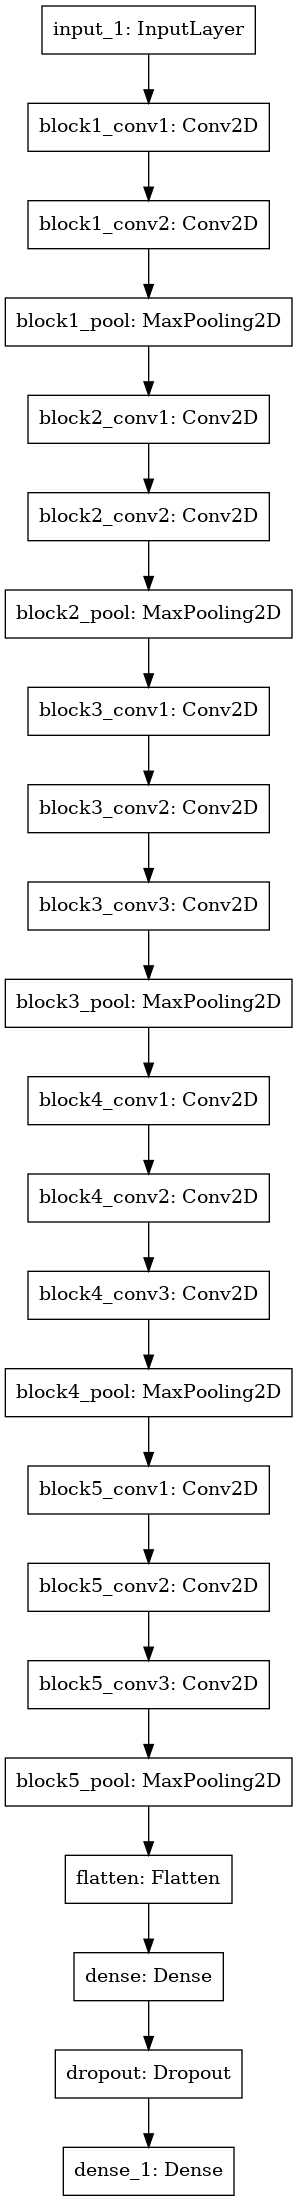

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [13]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

nb_train_samples = 1098
nb_validation_samples = 272
epochs = 20

In [14]:
checkpoint = ModelCheckpoint(os.getcwd() + "/Trained Models/flower_cnn_1.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=5,
                          verbose=1,
                          restore_best_weights=True)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='log_dir/model', histogram_freq=1)

callbacks = [earlystop, checkpoint, tensorboard_callback]

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/20
33/34 [============================>.] - ETA: 1s - loss: 10.7695 - accuracy: 0.1049
Epoch 00001: val_loss improved from inf to 2.30582, saving model to /home/amogh/Documents/Study/MLDL/Trained Models/flower_cnn_1.h5
34/34 [==============================] - 68s 2s/step - loss: 10.5311 - accuracy: 0.1073 - val_loss: 2.3058 - val_accuracy: 0.2949
Epoch 2/20
33/34 [============================>.] - ETA: 1s - loss: 2.4890 - accuracy: 0.2447
Epoch 00002: val_loss improved from 2.30582 to 1.94336, saving model to /home/amogh/Documents/Study/MLDL/Trained Models/flower_cnn_1.h5
34/34 [==============================] - 55s 2s/step - loss: 2.4781 - accuracy: 0.2476 - val_loss: 1.9434 - val_accuracy: 0.3547
Epoch 3/20
33/34 [============================>.] - ETA: 1s - loss: 2.3116 - accuracy: 0.2922
Epoch 00003: val_loss improved from 1.94336 to 1.47359, saving model to /home/amogh/Documents/Study/MLDL/Trained Models/flower_cnn_1.h5
34/34 [==============================] - 55s 2s/step -

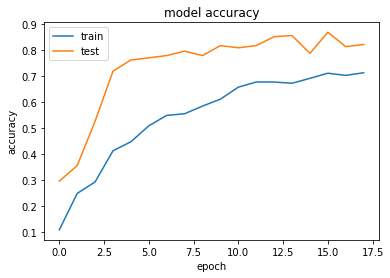

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

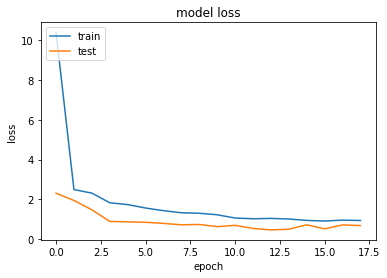

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
from tensorflow.keras.models import load_model
loaded_model = load_model(os.getcwd() + "/Trained Models/flower_cnn_1.h5")

In [18]:
from os import listdir
from tensorflow.keras.preprocessing import image
from tqdm import tqdm
import numpy as np

path = validation_data_dir
image_dimension = 224
flower_labels = {v: k for k, v in validation_generator.class_indices.items()}

  0%|          | 0/10 [00:00<?, ?it/s]

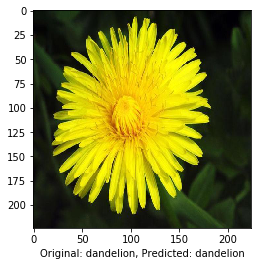

 10%|█         | 1/10 [00:00<00:08,  1.01it/s]

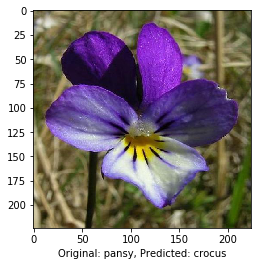

 20%|██        | 2/10 [00:01<00:06,  1.31it/s]

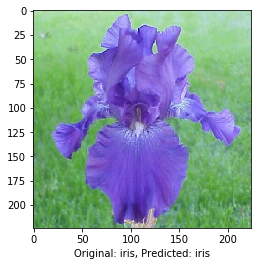

 30%|███       | 3/10 [00:01<00:04,  1.67it/s]

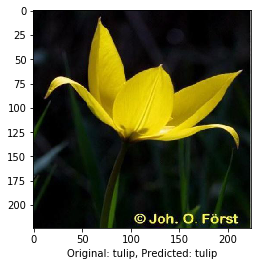

 40%|████      | 4/10 [00:01<00:03,  2.00it/s]

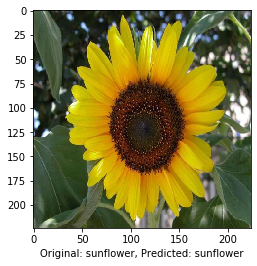

 50%|█████     | 5/10 [00:01<00:02,  2.39it/s]

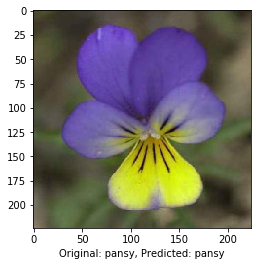

 60%|██████    | 6/10 [00:02<00:01,  2.77it/s]

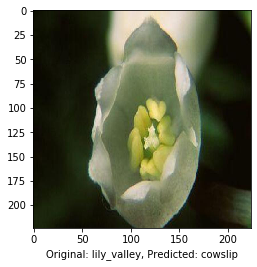

 70%|███████   | 7/10 [00:02<00:00,  3.01it/s]

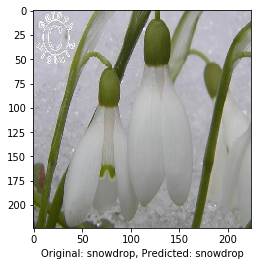

 80%|████████  | 8/10 [00:02<00:00,  3.21it/s]

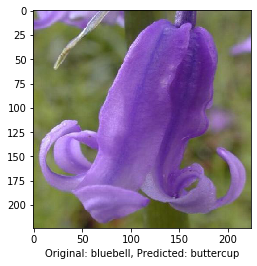

 90%|█████████ | 9/10 [00:02<00:00,  3.38it/s]

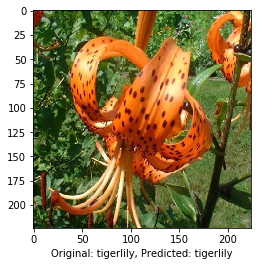

100%|██████████| 10/10 [00:03<00:00,  3.11it/s]


In [19]:
for i in tqdm(range(10)):
    flower_names = os.listdir(path)
    flower_names_folders = os.listdir(path)
    random_flower_index = np.random.randint(0,len(flower_names))
    flower_name = flower_names_folders[random_flower_index]

    flower_images_path = path + '/' + flower_name
    flower_images = os.listdir(flower_images_path)
    random_flower_image_index = np.random.randint(0,len(flower_images))
    flower_image = flower_images[random_flower_image_index]
    flower_image_path = flower_images_path + '/' + flower_image
    
    result_image_array = image.img_to_array(image.load_img(flower_image_path, target_size = (image_dimension, image_dimension)))
    normalized_result = result_image_array * 1./255
    expanded_result = np.expand_dims(normalized_result, axis=0)
    flower_breed = np.argmax(loaded_model.predict(expanded_result), axis=1)
    predicted_label = flower_labels[int(flower_breed)]
    
    plt.imshow(image.load_img(flower_image_path, target_size = (image_dimension, image_dimension)))
    plt.xlabel('Original: {}, Predicted: {}'.format(flower_name, predicted_label))
    plt.show()